In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
AR=pd.read_excel("Online retail.xlsx", header=None)
AR


,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [5]:
AR.isnull().sum()

0    0
dtype: int64

# Association Rule Mining:

In [34]:
!pip install mlxtend
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [35]:
transactions = AR[0].str.split(',').tolist()


In [36]:
for transaction in transactions[:5]:
    print(transaction)

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


In [38]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets 

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, milk, ground beef)"
253,0.017064,"(mineral water, spaghetti, ground beef)"
254,0.015731,"(mineral water, milk, spaghetti)"
255,0.010265,"(mineral water, spaghetti, olive oil)"


In [40]:
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   257 non-null    float64
 1   itemsets  257 non-null    object 
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [41]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,0.413630
1,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
3,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080,0.420238
4,(burgers),(chocolate),0.087188,0.163845,0.017064,0.195719,1.194537,0.002779,1.039630,0.178411
...,...,...,...,...,...,...,...,...,...,...
401,"(mineral water, spaghetti)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,0.005788,1.119933,0.536902
402,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452
403,(mineral water),"(pancakes, spaghetti)",0.238368,0.025197,0.011465,0.048098,1.908923,0.005459,1.024059,0.625163
404,(pancakes),"(mineral water, spaghetti)",0.095054,0.059725,0.011465,0.120617,2.019529,0.005788,1.069244,0.557862


# Analysis and Interpretation:

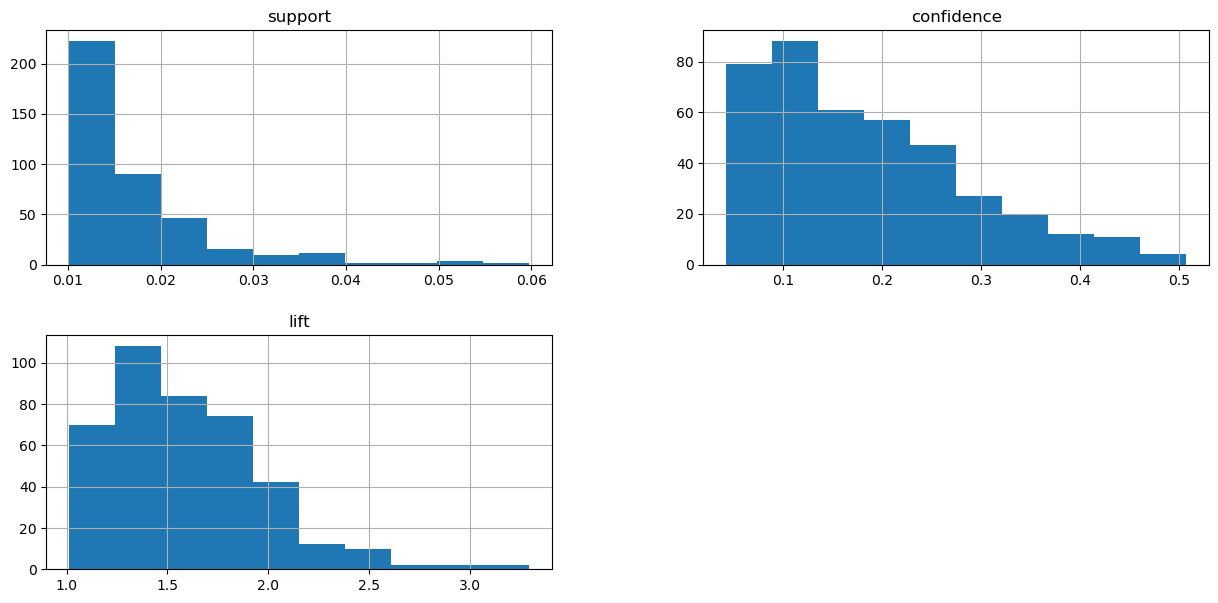

In [44]:

rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

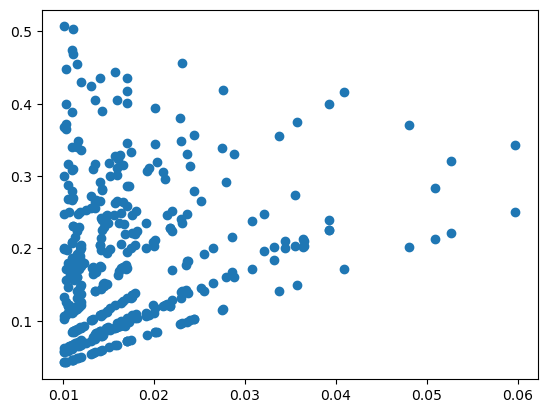

In [45]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

In [46]:
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
215,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460
214,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,0.772094
382,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,0.697788
387,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,0.727602
399,(olive oil),"(mineral water, spaghetti)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,0.660314
...,...,...,...,...,...,...,...,...,...,...
155,(french fries),(low fat yogurt),0.170911,0.076523,0.013332,0.078003,1.019340,0.000253,1.001605,0.022885
131,(olive oil),(eggs),0.065858,0.179709,0.011998,0.182186,1.013783,0.000163,1.003029,0.014554
130,(eggs),(olive oil),0.179709,0.065858,0.011998,0.066766,1.013783,0.000163,1.000973,0.016574
144,(spaghetti),(escalope),0.174110,0.079323,0.013998,0.080398,1.013557,0.000187,1.001169,0.016196


# Interpretation
(herb & pepper) & (ground beef) is more likely to be purchased together as antecedents consequents as because this combination has the highest lift,confidence and support, where as, 	(escalope) & (spaghetti) are the least purchasing combination.

In [50]:
rules[rules["consequents"]== ({"ground beef"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,(burgers),(ground beef),0.087188,0.098254,0.011998,0.137615,1.400607,0.003432,1.045642,0.313344
78,(chocolate),(ground beef),0.163845,0.098254,0.023064,0.140765,1.432669,0.006965,1.049476,0.361180
120,(eggs),(ground beef),0.179709,0.098254,0.019997,0.111276,1.132539,0.002340,1.014653,0.142666
176,(frozen vegetables),(ground beef),0.095321,0.098254,0.016931,0.177622,1.807796,0.007565,1.096511,0.493921
194,(grated cheese),(ground beef),0.052393,0.098254,0.011332,0.216285,2.201294,0.006184,1.150605,0.575895
200,(green tea),(ground beef),0.132116,0.098254,0.014798,0.112008,1.139990,0.001817,1.015489,0.141493
215,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460
216,(milk),(ground beef),0.129583,0.098254,0.021997,0.169753,1.727704,0.009265,1.086118,0.483903
218,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672,0.561638
221,(olive oil),(ground beef),0.065858,0.098254,0.014131,0.214575,2.183889,0.007661,1.148100,0.580320


# Interview Questions:
1.	What is lift and why is it important in Association rules?
=>Lift is an important metric in association rule mining because it provides a normalized measure of the strength of an association rule, accounting for the independent probabilities of the antecedent and consequent. It helps in identifying meaningful and interesting rules, filtering out redundant ones, and ensuring that the discovered associations are truly significant and not just due to the individual frequencies of items

2.	What is support and Confidence. How do you calculate them?
=>Support quantifies the frequency of the occurrence of an itemset in the dataset. High support indicates that the rule is applicable to a large portion of the dataset.
Confidence measures the likelihood of the consequent given the antecedent. High confidence indicates that the rule is reliable and the consequent is likely to occur when the antecedent occurs.

3.What are some limitations or challenges of Association rules mining?
=>Association rule mining, a powerful data mining technique, has its share of limitations and challenges. These include dealing with large search spaces, potential for spurious correlations, sensitivity to data quality issues, scalability concerns with increasing dataset sizes, risks of spurious associations due to multiple testing, interpretability challenges, addressing rare items, and context dependency. Overcoming these challenges requires careful data preprocessing, algorithmic optimizations, and domain expertise to ensure the extraction of meaningful and reliable association rules.
